In [1]:
import numpy as np
import itertools
import csv
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import networkx as nx

Внимание: для удобства в csv-таблицу был дописан заголовок "Location".

In [2]:
adjacency_matrix = pd.read_csv("task-2-adjacency_matrix.csv").set_index("Location")
adjacency_matrix

,Канавинский мост 1,Канавинский мост 2,Вокзал,Метромост 1,Метромост 2,Молитовский мост 1,Молитовский мост 2,Мызинский мост 2,Борский мост 1,Борский мост 2,...,Святой источник Пафнутия Балахнинского,Перекресток 1,Перекресток 2,Перекресток 3,Перекресток 4,Мызинский мост 1,Перекресток 5,Перекресток 6,Перекресток 7,Перекресток 8
Location,,,,,,,,,,,,,,,,,,,,,
Канавинский мост 1,0,3,-,4,-,-,-,-,-,-,...,-,-,-,-,-,-,-,5,-,3
Канавинский мост 2,3,0,5,-,4,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Вокзал,-,5,0,-,2,-,6,-,-,5,...,-,-,10,3,-,-,-,-,-,-
Метромост 1,4,-,-,0,3,-,-,-,-,-,...,-,-,-,-,-,-,-,4,-,-
Метромост 2,-,4,2,3,0,-,8,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Молитовский мост 1,-,-,-,-,-,0,2,-,-,-,...,-,-,-,-,-,-,6,4,-,-
Молитовский мост 2,-,-,6,-,8,2,0,6,-,-,...,-,8,7,5,-,-,-,-,-,-
Мызинский мост 2,-,-,-,-,-,-,6,0,-,-,...,-,8,-,-,-,3,-,-,-,-
Борский мост 1,-,-,-,-,-,-,-,-,0,3,...,-,-,-,-,-,-,-,-,-,-


In [3]:
#Отсутствие ребра между вершинами графа кодируем числом 5000
graph = np.zeros(np.asarray(adjacency_matrix).shape)
A = np.asarray(adjacency_matrix)
for i in range(len(A)):
    for j in range(len(A[0])):
        if A[i][j] == '-':
            graph[i][j] = 5000
for i in range(len(A)):
    for j in range(len(A[0])):
        if A[i][j] != '-':
            graph[i][j] = int(A[i][j])

In [32]:
tickets = pd.read_csv("task-2-nodes.csv")
tickets = np.asarray(tickets)
tickets_2 = np.zeros(len(tickets))
for i in range(len(tickets)):
    tickets_2[i] = tickets[i][1]
    
letters = [
    'Канавинский мост 1', 'Канавинский мост 2', 'Вокзал', 'Метромост 1', 'Метромост 2',
    'Молитовский мост 1', 'Молитовский мост 2', 'Мызинский мост 2', 'Борский мост 1',
    'Борский мост 2', 'Паромная переправа 1', 'Паромная переправа 2', 'Памятник Горькому',
    'Борский музей военной техники', 'Борский краеведческий музей', 'Неклюдово',
    'Музей Сахарова', 'Зоопарк', 'Копосовская дубрава', 'Стрелка', 'Собор Александра Невского',
    'Нижегородская ярмарка', 'Мещерское озеро', 'Парк 1 мая', 'Нижегородский планетарий',
    'Спасский Староярмарочный собор', 'Кремль', 'Памятник Минину и Пожарскому',
    'Чкаловская лестница', 'Рождественская церковь', 'Домик Петра 1', 'Набережная Федоровского',
    'Усадьба Рукавишниковых', 'Церковь Рождества Иоанна Предтечи на Торгу',
    'Благовещенский монастырь', 'Нижне-Волжская набережная', 'Большая Покровская улица',
    'Большая Покровская улица 2', 'Площадь Минина и Пожарского',
    'Обзорная площадка на Гремячей горе', 'Музей истории художественных промыслов',
    'Никольский собор', 'Музей «Паровозы России»', 'Русский музей фотографии',
    'Литературный музей им. Горького', 'Музей народов Нижегородского поволжья',
    'Щёлоковский хутор', 'Святой источник Пафнутия Балахнинского', 'Перекресток 1',
    'Перекресток 2', 'Перекресток 3', 'Перекресток 4', 'Мызинский мост 1', 'Перекресток 5',
    'Перекресток 6', 'Перекресток 7', 'Перекресток 8'
]

for i in range(len(letters)-1):
    print(letters[1:][i], int(tickets_2[i]))

56
Канавинский мост 2 0
Вокзал 0
Метромост 1 0
Метромост 2 0
Молитовский мост 1 0
Молитовский мост 2 0
Мызинский мост 2 0
Борский мост 1 0
Борский мост 2 0
Паромная переправа 1 0
Паромная переправа 2 0
Памятник Горькому 2
Борский музей военной техники 2
Борский краеведческий музей 2
Неклюдово 0
Музей Сахарова 5
Зоопарк 5
Копосовская дубрава 2
Стрелка 9
Собор Александра Невского 3
Нижегородская ярмарка 5
Мещерское озеро 2
Парк 1 мая 3
Нижегородский планетарий 3
Спасский Староярмарочный собор 2
Кремль 9
Памятник Минину и Пожарскому 5
Чкаловская лестница 9
Рождественская церковь 3
Домик Петра 1 3
Набережная Федоровского 2
Усадьба Рукавишниковых 3
Церковь Рождества Иоанна Предтечи на Торгу 2
Благовещенский монастырь 5
Нижне-Волжская набережная 2
Большая Покровская улица 5
Большая Покровская улица 2 3
Площадь Минина и Пожарского 5
Обзорная площадка на Гремячей горе 3
Музей истории художественных промыслов 5
Никольский собор 2
Музей «Паровозы России» 2
Русский музей фотографии 2
Литературный

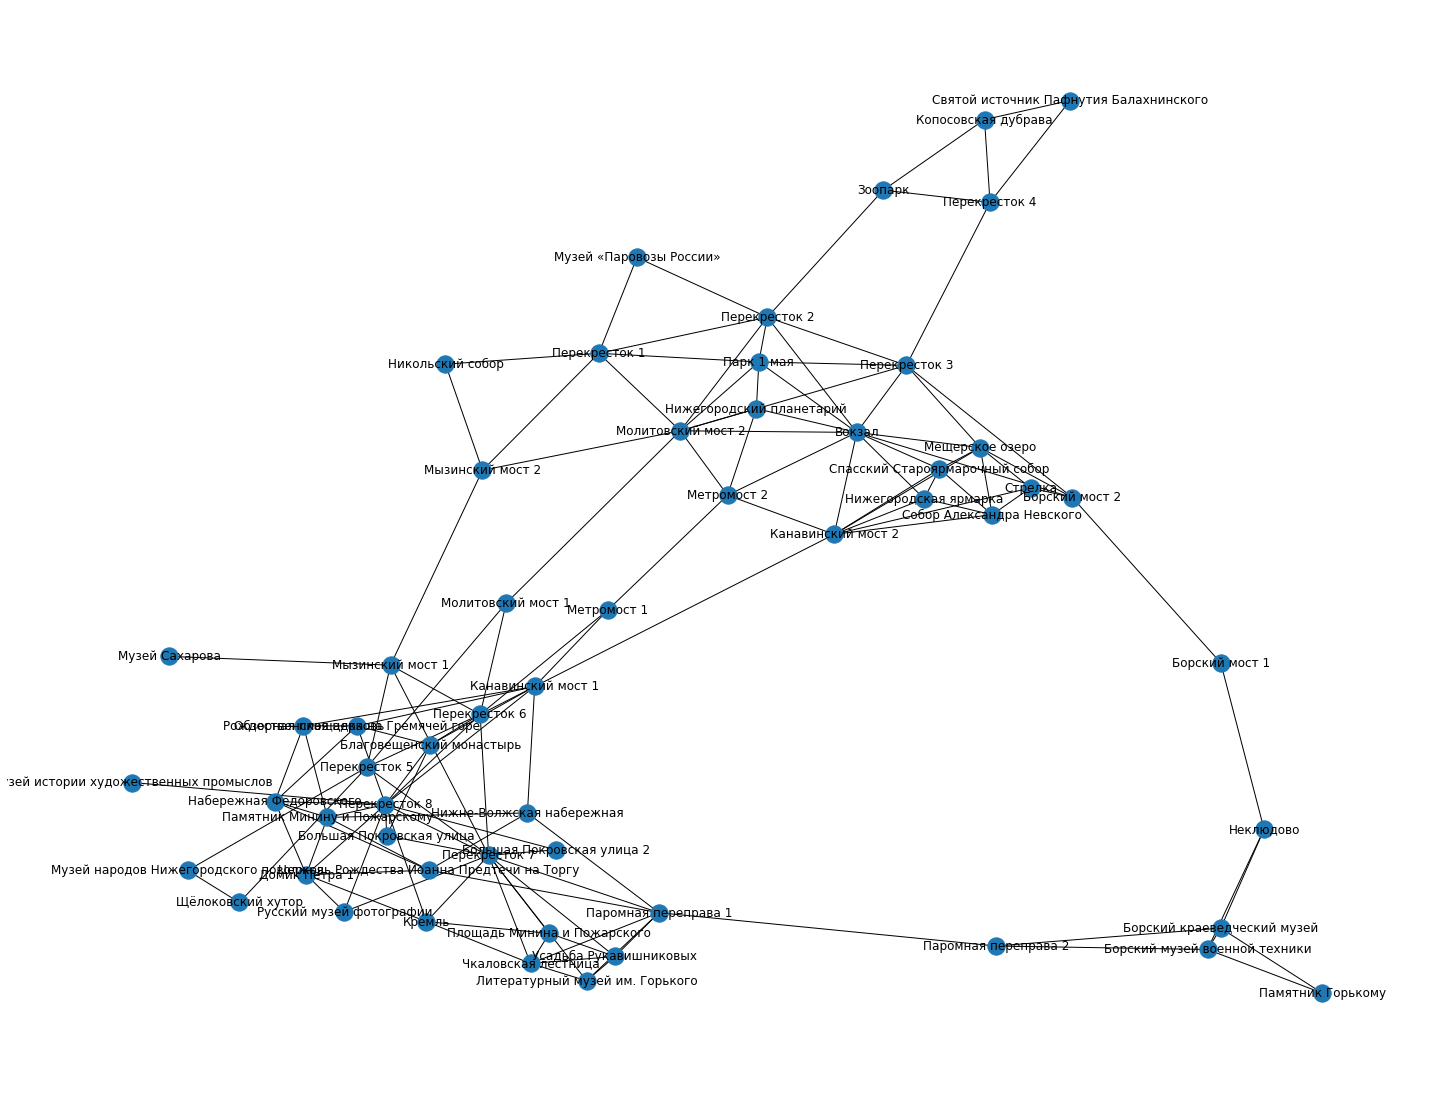

In [5]:
points = list(adjacency_matrix.keys())
graph1 = nx.Graph()
for i, k0 in enumerate(points):
    for k1 in points[:i]:
        if adjacency_matrix[k0][k1] != "-":
            graph1.add_edge(k0, k1, distance=int(adjacency_matrix[k0][k1]))
plt.figure(figsize=(20, 15))
nx.draw(graph1, with_labels = True)

Рассмотрим задачу коммивояжера для графа $G = (V, E)$, $|V| = N$. Для Гамильтонова цикла мы можем ввести $N^2$ бинарных переменных $x_{i, p}$. Каждая переменная $x_{i, p}$ равна 1, если i-я вершина находится на p-м шаге пути и 0, если нет. Можно перейти от двух индексов к одному путём введения индекса $iN + p$. Функция стоимости:


$$H = A\sum\limits_{i, p}(x_{iN + p} + \xi\cdot 15 - 15)^2 + A\sum\limits_{i=1}^N(1 - \sum\limits_{p=1}^N x_{i, p})^2 + A\sum\limits_{(uv) \notin E }\sum\limits_{p=1}^N x_{u, p}x_{v, p+1} + B\sum\limits_{(uv) \in E }W_{uv}\sum\limits_{p=1}^N x_{u, p}x_{v, p+1} + C(\sum_{j = 0}^3 2^j x_{N^2 + 1 + j} - \sum_{i, p} x_{iN + p} \cdot m_i)^2$$ 


Первое слагаемое - следует из ограничения типа неравенство на число циклов (их не более 15). Для этого в бинарный вектор $x_{iN + p}$ добавляется переменная $\xi \in \{0, 1\}$.

Второе слагаемое - каждая вершина должна попасть в путь. 

Третье слагаемое - между вершинами соседних шагов пути должно быть ребро.

Четвертое слагаемое - добавляет веса рёбер из матрицы смежности графа.

Пятое слагаемое - оптимизирует заполнение автобуса согласно числу билетов на достопримечательности. В бинарный вектор $x_{iN + p}$  добавляются 4 дополнительные компоненты, через которые выражается разложение числа пассажиров по степеням двойки.

In [20]:
def QUBO(G, m, A, B, C):
    
    '''
    Функция строит QUBO-матрицу в соответствиии с гамильтонианом H. 
    G - матрица смежности графа. Её элементы - веса рёбер.
    '''
    K = 15
    # Первое слагаемое гамильтониана
    def first_term(G, K):
        N = G.shape[0]
        F = np.ones([N**2, N**2])
        for i in range(N**2 - 1):
            F[i][i] = 1 - K
        for i in range(N**2 - 1):
            F[i][N**2-1] = K
            F[N**2-1][i] = K
        F[N**2-1][N**2-1] = - K**2
        V = np.zeros([N**2+5, N**2+5])
        for i in range(N**2):
            for j in range(N**2):
                V[i][j] = F[i][j]
        return V
        
    # Второе слагаемое гамильтониана
    def second_term(G):
        N = G.shape[0]
        F = np.ones([N, N])
        for i in range(N):
            F[i][i] = -1
        M = block_diag(*(F for _ in range(N)))
        V = np.zeros([N**2+5, N**2+5])
        for i in range(N**2):
            for j in range(N**2):
                V[i][j] = M[i][j]
        return V

    # Третье слагаемое гамильтониана
    def third_term(G):
        N = G.shape[0]
        M = np.zeros([N**2, N**2])
        for i in range(N):
            for j in range(N):
                if G[i][j] == 5000:
                    for p in range(N-1):
                        M[N*i + p][N*j + p + 1] = 1
        V = np.zeros([N**2+5, N**2+5])
        for i in range(N**2):
            for j in range(N**2):
                V[i][j] = M[i][j]
        return V

    # Четвертое слагаемое гамильтониана
    def fourth_term(G):
        N = G.shape[0]
        M = np.zeros([N**2, N**2])
        for i in range(N):
            for j in range(N):
                if G[i][j] != 5000 and G[i][j] != 0:
                    for p in range(N-1):
                        M[i*N + p][j*N + p + 1] = G[i][j]
        V = np.zeros([N**2+5, N**2+5])
        for i in range(N**2):
            for j in range(N**2):
                V[i][j] = M[i][j]
        return V
    
    
    def fifth_term(G, m):
        N = G.shape[0]
        V = np.zeros([N**2+5, N**2+5])
        for i in range(N**2):
            V[i][i] = m[i // N - 1]
        for i in range(N**2 + 1, N**2 + 5):
            V[i][i] = 2**(i - N**2 - 1)
        for i in range(N**2):
            for j in range(N**2 + 1, N**2 + 5):
                V[i][j] = -m[i // N - 1]*2**(j - N**2 - 1)
                V[j][i] = -m[i // N - 1]*2**(j - N**2 - 1)
        return V
        
    First = first_term(G, 15)
    Second = second_term(G)
    Third = third_term(G) 
    four = fourth_term(G)
    five = fifth_term(G, m)
    
    return A*(First + Second + Third) + B*four + C*five

In [21]:
# С помощью этой функции из графа удаляется вершина "Вокзал", которая является началом и концом пути.
def remove_row_col(matrix, i):
    new_matrix = np.delete(matrix, i, axis=0)
    new_matrix = np.delete(new_matrix, i, axis=1)
    return new_matrix

In [22]:
B = QUBO(remove_row_col(graph, 2), tickets_2, 100, 1, 1)

Попытка решения с помощью dwave:

In [23]:
from dwave.samplers import SimulatedAnnealingSampler
sampler = SimulatedAnnealingSampler()
import dimod

In [24]:
sampleset = sampler.sample_qubo(B, num_reads = 1)
sampleset

SampleSet(rec.array([([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:


for i in range(sampleset.record.shape[0]):
    N = 57 - 1
    F = sampleset.record[0][0][0:N**2].reshape(N, N)
    U = []
    weight = 0
    for i in range(F.shape[0]):
        for j in range(F.shape[1]):
            if F[i][j] == 1:
                U.append([letters[i], i, j])
    res = sorted(U, reverse=False, key=lambda x: x[2])
    string = 'Вокзал-'
    count = 0
    for i in range(len(res)):
        string += res[i][0] + "-"
        count += 1
    string += "Вокзал"
    print(count)
    print(string)

9
Вокзал-Музей истории художественных промыслов-Музей Сахарова-Кремль-Большая Покровская улица-Стрелка-Чкаловская лестница-Музей народов Нижегородского поволжья-Площадь Минина и Пожарского-Щёлоковский хутор-Вокзал


In [35]:
#стоимость маршрута (число билетов)
5 + 5 + 9 + 5 + 9 + 9 + 5 + 5 + 9

61

Попытка решения с помощью QBoard (файл Task_2_QB.py):

In [144]:
QB = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

In [147]:
N = 57 - 1
F = np.array(QB[:N**2]).reshape(N, N)
M = F
#if M[1][0] == 1 or M[3][0] == 1 or M[5][0] == 1 or M[9][0] == 1 or M[20][0] == 1 or M[21][0] == 1 or M[22][0] == 1 or M[23][0] == 1 or M[24][0] == 1 and M[48][0] == 1 or M[49][0] == 1:
U = []
weight = 0
for i in range(F.shape[0]):
    for j in range(F.shape[1]):
        if F[i][j] == 1:
            U.append([letters[i], i, j])
res = sorted(U, reverse=False, key=lambda x: x[2])
string = 'Вокзал-'
count = 0
for i in range(len(res)):
    string += res[i][0] + "-"
    count += 1
string += "Вокзал"
print(count)
print(string)

20
Вокзал-Стрелка-Кремль-Кремль-Стрелка-Щёлоковский хутор-Стрелка-Щёлоковский хутор-Чкаловская лестница-Стрелка-Кремль-Чкаловская лестница-Щёлоковский хутор-Кремль-Чкаловская лестница-Кремль-Чкаловская лестница-Стрелка-Кремль-Стрелка-Стрелка-Вокзал
